## Run m_skill times with m_skill += 1 each times

With 1 skill : 
Generation: 1	Fitness: 176716.57814000003	Population: 217
Generation: 2	Fitness: 143563.35479	Population: 248
Generation: 3	Fitness: 127935.47337700002	Population: 322
Generation: 4	Fitness: 65230.842860000004	Population: 360
Generation: 5	Fitness: 0.0	Population: 391
Generation: 6	Fitness: 0.0	Population: 395
Generation: 7	Fitness: 0.0	Population: 399
Generation: 8	Fitness: 0.0	Population: 397
Generation: 9	Fitness: 0.0	Population: 399
['tanphatls987', 125706.7405] 

['I_love_tigersugar', 89816.10909] 

['Akikaze', 95588.21905] 



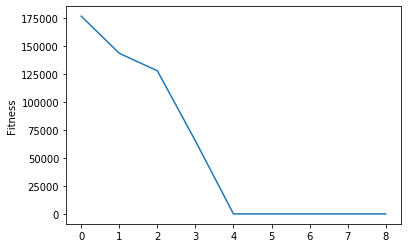

Excution time: 0:00:00.060837s


With 2 skill : 
Generation: 1	Fitness: 182303.5750137771	Population: 220
Generation: 2	Fitness: 127281.3392758748	Population: 265
Generation: 3	Fitness: 61498.59796261332	Population: 349
Generation: 4	Fitness: 61498.59796261332	Population: 369
Generation: 5	Fitness: 26996.704700000002	Population: 392
Generation: 6	Fitness: 26361.74851965037	Population: 397
Generation: 7	Fitness: 23821.58091736276	Population: 399
Generation: 8	Fitness: 23821.58091736276	Population: 400
Generation: 9	Fitness: 23821.58091736276	Population: 400
Generation: 10	Fitness: 23821.58091736276	Population: 398
Generation: 11	Fitness: 23821.58091736276	Population: 399
['Akikaze', 95588.21905, 152897.219] 

['thienlongtpct', 66882.86905, 125505.6857] 

['tanphatls987', 125706.7405, 108050.1643] 



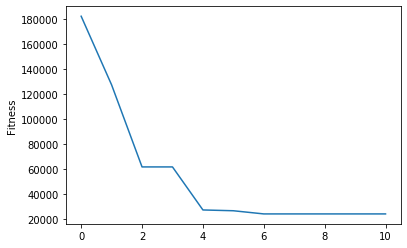

Excution time: 0:00:00.086308s


With 3 skill : 
Generation: 1	Fitness: 261514.24373060942	Population: 214
Generation: 2	Fitness: 213688.84008535356	Population: 246
Generation: 3	Fitness: 199170.7644334297	Population: 318
Generation: 4	Fitness: 103714.07920193486	Population: 367
Generation: 5	Fitness: 53510.502738966694	Population: 385
Generation: 6	Fitness: 53510.502738966694	Population: 394
Generation: 7	Fitness: 30368.274296464908	Population: 395
Generation: 8	Fitness: 30368.274296464908	Population: 397
Generation: 9	Fitness: 30368.274296464908	Population: 400
Generation: 10	Fitness: 30368.274296464908	Population: 400
Generation: 11	Fitness: 30368.274296464908	Population: 399
['tanphatls987', 125706.7405, 108050.1643, 9688.733333] 

['Akikaze', 95588.21905, 152897.219, 14612.28333] 

['flashmt', 81797.33214, 106837.8238, 13434.43333] 



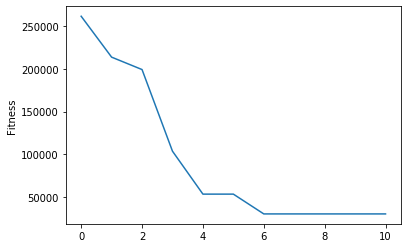

Excution time: 0:00:00.083775s


With 4 skill : 
Generation: 1	Fitness: 221967.8844513001	Population: 215
Generation: 2	Fitness: 191188.4947453126	Population: 257
Generation: 3	Fitness: 180545.2272713885	Population: 323
Generation: 4	Fitness: 53513.84604130453	Population: 372
Generation: 5	Fitness: 32623.042607004823	Population: 392
Generation: 6	Fitness: 31596.910861148586	Population: 395
Generation: 7	Fitness: 31596.910861148586	Population: 397
Generation: 8	Fitness: 31596.910861148586	Population: 398
Generation: 9	Fitness: 31596.910861148586	Population: 400
Generation: 10	Fitness: 31596.910861148586	Population: 400
['tanphatls987', 125706.7405, 108050.1643, 9688.733333, 8277.116667] 

['I_love_tigersugar', 89816.10909, 104953.6857, 12950.16667, 19596.60909] 

['Akikaze', 95588.21905, 152897.219, 14612.28333, 9394.183333] 



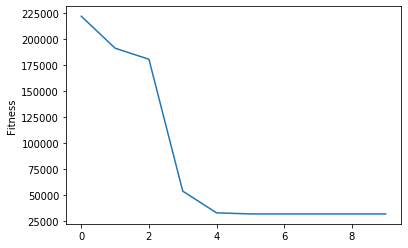

Excution time: 0:00:00.097456s


With 5 skill : 
Generation: 1	Fitness: 289894.1005790651	Population: 224
Generation: 2	Fitness: 233365.69277851158	Population: 266
Generation: 3	Fitness: 124227.42891471188	Population: 344
Generation: 4	Fitness: 61476.282991062384	Population: 386
Generation: 5	Fitness: 33263.79246496843	Population: 393
Generation: 6	Fitness: 33263.79246496843	Population: 397
Generation: 7	Fitness: 33263.79246496843	Population: 398
Generation: 8	Fitness: 33263.79246496843	Population: 399
Generation: 9	Fitness: 33263.79246496843	Population: 399
['Akikaze', 95588.21905, 152897.219, 14612.28333, 9394.183333, 54267.06905] 

['flashmt', 81797.33214, 106837.8238, 13434.43333, 12914.98333, 52219.16429] 

['tanphatls987', 125706.7405, 108050.1643, 9688.733333, 8277.116667, 35564.07619] 



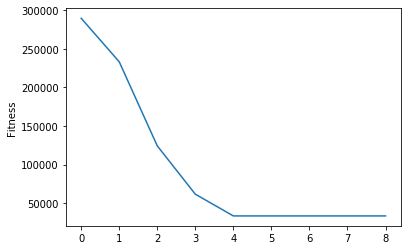

Excution time: 0:00:00.078789s


With 6 skill : 
Generation: 1	Fitness: 309156.55640238576	Population: 214
Generation: 2	Fitness: 274219.1194187465	Population: 245
Generation: 3	Fitness: 161061.0339523029	Population: 302
Generation: 4	Fitness: 53551.71169439919	Population: 362
Generation: 5	Fitness: 53551.71169439919	Population: 382
Generation: 6	Fitness: 35091.11068017279	Population: 394
Generation: 7	Fitness: 35091.11068017279	Population: 396
Generation: 8	Fitness: 35091.11068017279	Population: 397
Generation: 9	Fitness: 35091.11068017279	Population: 395
Generation: 10	Fitness: 35091.11068017279	Population: 395
['flashmt', 81797.33214, 106837.8238, 13434.43333, 12914.98333, 52219.16429, 31014.26786] 

['Akikaze', 95588.21905, 152897.219, 14612.28333, 9394.183333, 54267.06905, 30121.15238] 

['tanphatls987', 125706.7405, 108050.1643, 9688.733333, 8277.116667, 35564.07619, 26902.9619] 



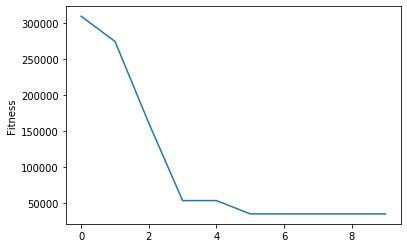

Excution time: 0:00:00.097769s


With 7 skill : 
Generation: 1	Fitness: 326938.836111382	Population: 221
Generation: 2	Fitness: 302949.84009823325	Population: 254
Generation: 3	Fitness: 181894.12916124877	Population: 320
Generation: 4	Fitness: 181894.12916124877	Population: 356
Generation: 5	Fitness: 54376.727397468116	Population: 390
Generation: 6	Fitness: 54376.727397468116	Population: 396
Generation: 7	Fitness: 54376.727397468116	Population: 396
Generation: 8	Fitness: 54376.727397468116	Population: 397
Generation: 9	Fitness: 54376.727397468116	Population: 399
['tanphatls987', 125706.7405, 108050.1643, 9688.733333, 8277.116667, 35564.07619, 26902.9619, 61243.08333] 

['Akikaze', 95588.21905, 152897.219, 14612.28333, 9394.183333, 54267.06905, 30121.15238, 51085.07143] 

['I_love_tigersugar', 89816.10909, 104953.6857, 12950.16667, 19596.60909, 40048.05433, 38079.10433, 102108.8758] 



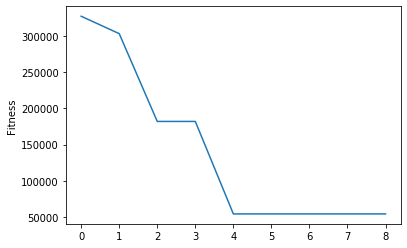

Excution time: 0:00:00.076349s


With 8 skill : 
Generation: 1	Fitness: 337153.8636823743	Population: 216
Generation: 2	Fitness: 248415.1486252253	Population: 253
Generation: 3	Fitness: 202442.71772128818	Population: 335
Generation: 4	Fitness: 182828.3637819261	Population: 365
Generation: 5	Fitness: 62103.67966809853	Population: 389
Generation: 6	Fitness: 54506.61456337747	Population: 395
Generation: 7	Fitness: 54506.61456337747	Population: 398
Generation: 8	Fitness: 54506.61456337747	Population: 400
Generation: 9	Fitness: 54506.61456337747	Population: 399
Generation: 10	Fitness: 54506.61456337747	Population: 398
['Akikaze', 95588.21905, 152897.219, 14612.28333, 9394.183333, 54267.06905, 30121.15238, 51085.07143, 80475.91905] 

['flashmt', 81797.33214, 106837.8238, 13434.43333, 12914.98333, 52219.16429, 31014.26786, 90998.04405, 95549.50714] 

['I_love_tigersugar', 89816.10909, 104953.6857, 12950.16667, 19596.60909, 40048.05433, 38079.10433, 102108.8758, 77778.36147] 



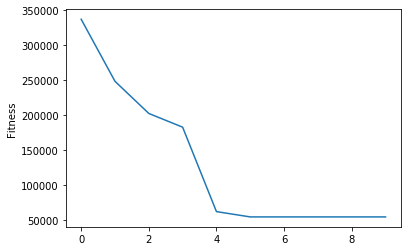

Excution time: 0:00:00.106006s


With 9 skill : 
Generation: 1	Fitness: 328551.0530958086	Population: 215
Generation: 2	Fitness: 328551.0530958086	Population: 244
Generation: 3	Fitness: 275721.015289432	Population: 291
Generation: 4	Fitness: 200780.88123632837	Population: 365
Generation: 5	Fitness: 123095.49501363168	Population: 385
Generation: 6	Fitness: 98990.02821703591	Population: 391
Generation: 7	Fitness: 54563.614934515535	Population: 395
Generation: 8	Fitness: 54563.614934515535	Population: 399
Generation: 9	Fitness: 54563.614934515535	Population: 396
Generation: 10	Fitness: 54563.614934515535	Population: 397
Generation: 11	Fitness: 54563.614934515535	Population: 397
['Akikaze', 95588.21905, 152897.219, 14612.28333, 9394.183333, 54267.06905, 30121.15238, 51085.07143, 80475.91905, 100.0] 

['I_love_tigersugar', 89816.10909, 104953.6857, 12950.16667, 19596.60909, 40048.05433, 38079.10433, 102108.8758, 77778.36147, 858.6666667] 

['flashmt', 81797.33214, 106837.8238, 13434.43333, 

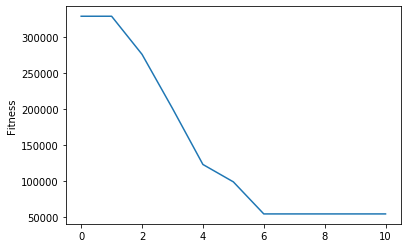

Excution time: 0:00:00.116947s


With 10 skill : 
Generation: 1	Fitness: 334303.18049633515	Population: 216
Generation: 2	Fitness: 260270.6926958704	Population: 254
Generation: 3	Fitness: 215968.8148847121	Population: 332
Generation: 4	Fitness: 141459.95821752626	Population: 364
Generation: 5	Fitness: 79503.5369579985	Population: 387
Generation: 6	Fitness: 59047.36682407095	Population: 394
Generation: 7	Fitness: 59047.36682407095	Population: 398
Generation: 8	Fitness: 54659.55048777454	Population: 396
Generation: 9	Fitness: 54659.55048777454	Population: 399
Generation: 10	Fitness: 54659.55048777454	Population: 400
Generation: 11	Fitness: 54659.55048777454	Population: 400
Generation: 12	Fitness: 54659.55048777454	Population: 399
['flashmt', 81797.33214, 106837.8238, 13434.43333, 12914.98333, 52219.16429, 31014.26786, 90998.04405, 95549.50714, 248.0, 1228.0] 

['Akikaze', 95588.21905, 152897.219, 14612.28333, 9394.183333, 54267.06905, 30121.15238, 51085.07143, 80475.91905, 100.0, 150.333

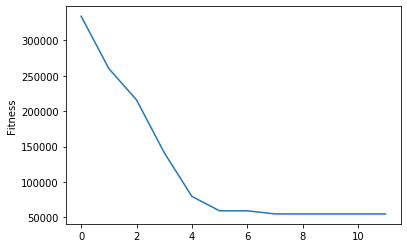

Excution time: 0:00:00.114494s


With 11 skill : 
Generation: 1	Fitness: 286774.53255690273	Population: 222
Generation: 2	Fitness: 188935.76749192728	Population: 268
Generation: 3	Fitness: 178462.00802364334	Population: 348
Generation: 4	Fitness: 62501.47735557572	Population: 377
Generation: 5	Fitness: 60651.76243779508	Population: 396
Generation: 6	Fitness: 54659.55048777452	Population: 399
Generation: 7	Fitness: 54659.55048777452	Population: 399
Generation: 8	Fitness: 54659.55048777452	Population: 399
Generation: 9	Fitness: 54659.55048777452	Population: 400
Generation: 10	Fitness: 54659.55048777452	Population: 399
['Akikaze', 95588.21905, 152897.219, 14612.28333, 9394.183333, 54267.06905, 30121.15238, 51085.07143, 80475.91905, 100.0, 150.3333333, 33666.28571] 

['I_love_tigersugar', 89816.10909, 104953.6857, 12950.16667, 19596.60909, 40048.05433, 38079.10433, 102108.8758, 77778.36147, 858.6666667, 835.0, 33023.34286] 

['flashmt', 81797.33214, 106837.8238, 13434.43333, 12914.98333, 5

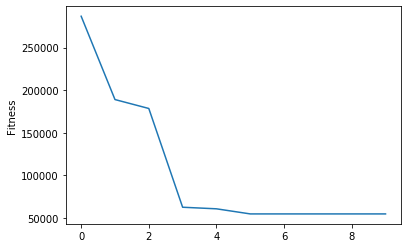

Excution time: 0:00:00.100730s


With 12 skill : 
Generation: 1	Fitness: 299165.20902373584	Population: 225
Generation: 2	Fitness: 226851.53208063118	Population: 266
Generation: 3	Fitness: 173184.9697059008	Population: 349
Generation: 4	Fitness: 121240.28231527089	Population: 384
Generation: 5	Fitness: 63354.04221187795	Population: 394
Generation: 6	Fitness: 54659.55048777452	Population: 397
Generation: 7	Fitness: 54659.55048777452	Population: 392
Generation: 8	Fitness: 54659.55048777452	Population: 392
Generation: 9	Fitness: 54659.55048777452	Population: 395
Generation: 10	Fitness: 54659.55048777452	Population: 397
['I_love_tigersugar', 89816.10909, 104953.6857, 12950.16667, 19596.60909, 40048.05433, 38079.10433, 102108.8758, 77778.36147, 858.6666667, 835.0, 33023.34286, 24913.18766] 

['Akikaze', 95588.21905, 152897.219, 14612.28333, 9394.183333, 54267.06905, 30121.15238, 51085.07143, 80475.91905, 100.0, 150.3333333, 33666.28571, 21886.56905] 

['flashmt', 81797.33214, 106837.8238, 1

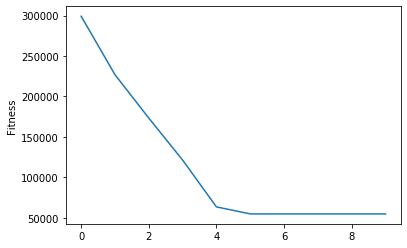

Excution time: 0:00:00.202457s


With 13 skill : 
Generation: 1	Fitness: 334441.46154815936	Population: 214
Generation: 2	Fitness: 329439.32155928685	Population: 247
Generation: 3	Fitness: 252982.89881505474	Population: 309
Generation: 4	Fitness: 191296.34502186827	Population: 353
Generation: 5	Fitness: 121596.23979879016	Population: 372
Generation: 6	Fitness: 54659.55048777454	Population: 398
Generation: 7	Fitness: 54659.55048777452	Population: 396
Generation: 8	Fitness: 54659.55048777452	Population: 399
Generation: 9	Fitness: 54659.55048777452	Population: 398
Generation: 10	Fitness: 54659.55048777452	Population: 398
['Akikaze', 95588.21905, 152897.219, 14612.28333, 9394.183333, 54267.06905, 30121.15238, 51085.07143, 80475.91905, 100.0, 150.3333333, 33666.28571, 21886.56905, 56055.65238] 

['I_love_tigersugar', 89816.10909, 104953.6857, 12950.16667, 19596.60909, 40048.05433, 38079.10433, 102108.8758, 77778.36147, 858.6666667, 835.0, 33023.34286, 24913.18766, 44249.58571] 

['flashmt',

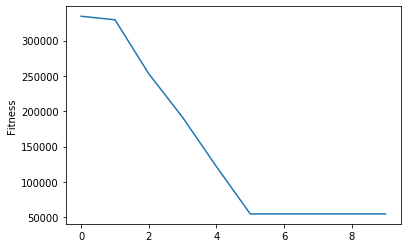

Excution time: 0:00:00.119678s


With 14 skill : 
Generation: 1	Fitness: 338459.91024553735	Population: 213
Generation: 2	Fitness: 338459.91024553735	Population: 240
Generation: 3	Fitness: 290352.8699746316	Population: 298
Generation: 4	Fitness: 152670.3525934115	Population: 361
Generation: 5	Fitness: 148856.92031956796	Population: 387
Generation: 6	Fitness: 132296.4926718576	Population: 392
Generation: 7	Fitness: 132296.4926718576	Population: 396
Generation: 8	Fitness: 110828.1546021528	Population: 395
Generation: 9	Fitness: 110828.1546021528	Population: 395
Generation: 10	Fitness: 110828.1546021528	Population: 398
Generation: 11	Fitness: 110828.1546021528	Population: 395
Generation: 12	Fitness: 54693.231638959915	Population: 397
Generation: 13	Fitness: 54693.231638959915	Population: 398
Generation: 14	Fitness: 54693.231638959915	Population: 397
Generation: 15	Fitness: 54693.231638959915	Population: 399
Generation: 16	Fitness: 54693.231638959915	Population: 397
['Akikaze', 95588.21905

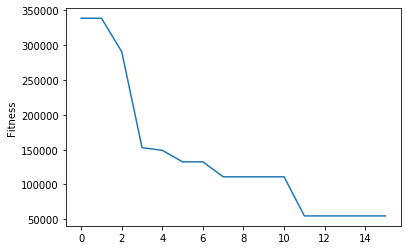

Excution time: 0:00:00.165564s


With 15 skill : 
Generation: 1	Fitness: 358762.7428828452	Population: 210
Generation: 2	Fitness: 223500.54248824136	Population: 246
Generation: 3	Fitness: 223500.54248824136	Population: 319
Generation: 4	Fitness: 214565.72135182796	Population: 364
Generation: 5	Fitness: 108606.82638145176	Population: 383
Generation: 6	Fitness: 54717.149346025086	Population: 393
Generation: 7	Fitness: 54717.149346025086	Population: 398
Generation: 8	Fitness: 54717.149346025086	Population: 393
Generation: 9	Fitness: 54717.149346025086	Population: 399
Generation: 10	Fitness: 54717.149346025086	Population: 398
['flashmt', 81797.33214, 106837.8238, 13434.43333, 12914.98333, 52219.16429, 31014.26786, 90998.04405, 95549.50714, 248.0, 1228.0, 41945.64286, 26661.19643, 52046.16429, 20112.29643, 3478.75] 

['I_love_tigersugar', 89816.10909, 104953.6857, 12950.16667, 19596.60909, 40048.05433, 38079.10433, 102108.8758, 77778.36147, 858.6666667, 835.0, 33023.34286, 24913.18766, 4424

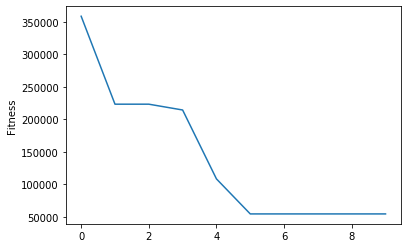

Excution time: 0:00:00.112698s


With 16 skill : 
Generation: 1	Fitness: 335814.28217992187	Population: 214
Generation: 2	Fitness: 248494.6054586383	Population: 248
Generation: 3	Fitness: 248494.6054586383	Population: 301
Generation: 4	Fitness: 170271.15936625184	Population: 367
Generation: 5	Fitness: 108935.70189049206	Population: 382
Generation: 6	Fitness: 54876.474820104544	Population: 392
Generation: 7	Fitness: 54876.474820104544	Population: 396
Generation: 8	Fitness: 54876.474820104544	Population: 397
Generation: 9	Fitness: 54876.474820104544	Population: 399
Generation: 10	Fitness: 54876.474820104544	Population: 396
['I_love_tigersugar', 89816.10909, 104953.6857, 12950.16667, 19596.60909, 40048.05433, 38079.10433, 102108.8758, 77778.36147, 858.6666667, 835.0, 33023.34286, 24913.18766, 44249.58571, 28433.15671, 2376.5, 6900.333333] 

['Akikaze', 95588.21905, 152897.219, 14612.28333, 9394.183333, 54267.06905, 30121.15238, 51085.07143, 80475.91905, 100.0, 150.3333333, 33666.28571, 21

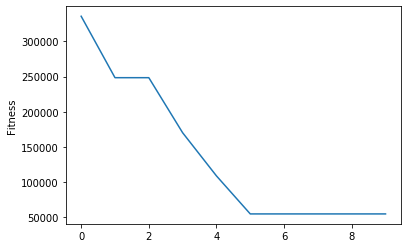

Excution time: 0:00:00.139177s


With 17 skill : 
Generation: 1	Fitness: 288858.064641062	Population: 224
Generation: 2	Fitness: 273488.3452015321	Population: 260
Generation: 3	Fitness: 197488.29487761218	Population: 343
Generation: 4	Fitness: 136978.0759872139	Population: 375
Generation: 5	Fitness: 66145.79815087504	Population: 398
Generation: 6	Fitness: 66145.79815087504	Population: 394
Generation: 7	Fitness: 66145.79815087504	Population: 398
Generation: 8	Fitness: 66145.79815087502	Population: 394
Generation: 9	Fitness: 66145.79815087502	Population: 398
['tanphatls987', 125706.7405, 108050.1643, 9688.733333, 8277.116667, 35564.07619, 26902.9619, 61243.08333, 73082.36667, 219.0, 149.0, 28087.62143, 14554.61667, 38825.75714, 17712.55, 2241.9, 3133.25, 66741.83333] 

['I_love_tigersugar', 89816.10909, 104953.6857, 12950.16667, 19596.60909, 40048.05433, 38079.10433, 102108.8758, 77778.36147, 858.6666667, 835.0, 33023.34286, 24913.18766, 44249.58571, 28433.15671, 2376.5, 6900.333333, 941

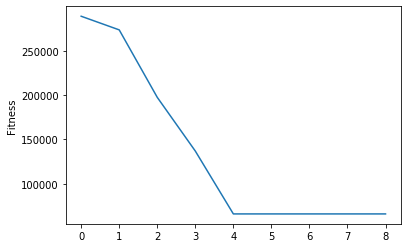

Excution time: 0:00:00.115656s


With 18 skill : 
Generation: 1	Fitness: 401063.61053105484	Population: 216
Generation: 2	Fitness: 340366.85468446807	Population: 258
Generation: 3	Fitness: 253803.33625113263	Population: 328
Generation: 4	Fitness: 155768.65987388493	Population: 370
Generation: 5	Fitness: 120342.05581444546	Population: 388
Generation: 6	Fitness: 66340.5842748737	Population: 393
Generation: 7	Fitness: 66340.5842748737	Population: 396
Generation: 8	Fitness: 66340.5842748737	Population: 397
Generation: 9	Fitness: 66340.5842748737	Population: 400
Generation: 10	Fitness: 66340.5842748737	Population: 399
['tanphatls987', 125706.7405, 108050.1643, 9688.733333, 8277.116667, 35564.07619, 26902.9619, 61243.08333, 73082.36667, 219.0, 149.0, 28087.62143, 14554.61667, 38825.75714, 17712.55, 2241.9, 3133.25, 66741.83333, 21683.45714] 

['Akikaze', 95588.21905, 152897.219, 14612.28333, 9394.183333, 54267.06905, 30121.15238, 51085.07143, 80475.91905, 100.0, 150.3333333, 33666.28571, 218

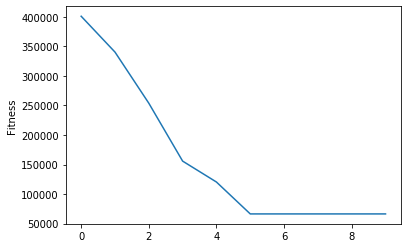

Excution time: 0:00:00.136633s


With 19 skill : 
Generation: 1	Fitness: 405904.6616720208	Population: 226
Generation: 2	Fitness: 326589.82437109516	Population: 266
Generation: 3	Fitness: 263652.0647172042	Population: 351
Generation: 4	Fitness: 179117.7959056498	Population: 377
Generation: 5	Fitness: 68347.08866065358	Population: 393
Generation: 6	Fitness: 68347.08866065358	Population: 397
Generation: 7	Fitness: 68347.08866065358	Population: 397
Generation: 8	Fitness: 68347.08866065358	Population: 399
Generation: 9	Fitness: 68347.08866065358	Population: 396
['I_love_tigersugar', 89816.10909, 104953.6857, 12950.16667, 19596.60909, 40048.05433, 38079.10433, 102108.8758, 77778.36147, 858.6666667, 835.0, 33023.34286, 24913.18766, 44249.58571, 28433.15671, 2376.5, 6900.333333, 9413.683333, 35737.20238, 70672.3329] 

['tanphatls987', 125706.7405, 108050.1643, 9688.733333, 8277.116667, 35564.07619, 26902.9619, 61243.08333, 73082.36667, 219.0, 149.0, 28087.62143, 14554.61667, 38825.75714, 1771

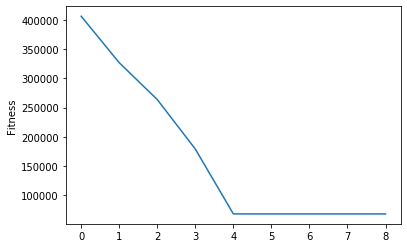

Excution time: 0:00:00.122009s


With 20 skill : 
Generation: 1	Fitness: 401213.1433883213	Population: 222
Generation: 2	Fitness: 364975.72336845624	Population: 265
Generation: 3	Fitness: 202157.03466652552	Population: 336
Generation: 4	Fitness: 163186.00251164692	Population: 379
Generation: 5	Fitness: 97765.88526361733	Population: 391
Generation: 6	Fitness: 68518.29091779547	Population: 398
Generation: 7	Fitness: 68518.29091779547	Population: 396
Generation: 8	Fitness: 68518.29091779547	Population: 399
Generation: 9	Fitness: 68518.29091779547	Population: 397
Generation: 10	Fitness: 68518.29091779547	Population: 398
['tanphatls987', 125706.7405, 108050.1643, 9688.733333, 8277.116667, 35564.07619, 26902.9619, 61243.08333, 73082.36667, 219.0, 149.0, 28087.62143, 14554.61667, 38825.75714, 17712.55, 2241.9, 3133.25, 66741.83333, 21683.45714, 54682.17619, 1352.25] 

['Akikaze', 95588.21905, 152897.219, 14612.28333, 9394.183333, 54267.06905, 30121.15238, 51085.07143, 80475.91905, 100.0, 150.

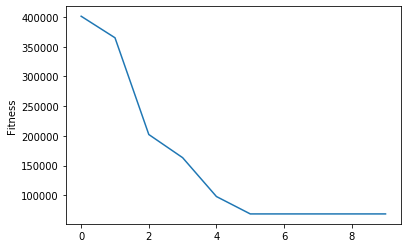

Excution time: 0:00:00.142897s


With 21 skill : 
Generation: 1	Fitness: 348473.12122491066	Population: 217
Generation: 2	Fitness: 282335.91443206323	Population: 250
Generation: 3	Fitness: 215212.52760785766	Population: 327
Generation: 4	Fitness: 160652.06392391885	Population: 378
Generation: 5	Fitness: 83303.44935127761	Population: 392
Generation: 6	Fitness: 68539.98102174705	Population: 400
Generation: 7	Fitness: 68539.98102174705	Population: 397
Generation: 8	Fitness: 68539.98102174705	Population: 398
Generation: 9	Fitness: 68539.98102174705	Population: 397
Generation: 10	Fitness: 68539.98102174705	Population: 397
['I_love_tigersugar', 89816.10909, 104953.6857, 12950.16667, 19596.60909, 40048.05433, 38079.10433, 102108.8758, 77778.36147, 858.6666667, 835.0, 33023.34286, 24913.18766, 44249.58571, 28433.15671, 2376.5, 6900.333333, 9413.683333, 35737.20238, 70672.3329, 4889.35, 2105.083333] 

['tanphatls987', 125706.7405, 108050.1643, 9688.733333, 8277.116667, 35564.07619, 26902.9619, 

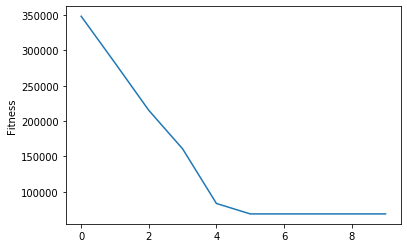

Excution time: 0:00:00.143618s


With 22 skill : 
Generation: 1	Fitness: 389481.8804482754	Population: 216
Generation: 2	Fitness: 372797.29600637226	Population: 250
Generation: 3	Fitness: 337859.64266764483	Population: 300
Generation: 4	Fitness: 218813.8255649659	Population: 357
Generation: 5	Fitness: 83322.76932069057	Population: 382
Generation: 6	Fitness: 83322.76932069057	Population: 393
Generation: 7	Fitness: 83322.76932069057	Population: 394
Generation: 8	Fitness: 68879.14395731712	Population: 397
Generation: 9	Fitness: 68879.14395731712	Population: 397
Generation: 10	Fitness: 68879.14395731712	Population: 397
Generation: 11	Fitness: 68879.14395731712	Population: 399
Generation: 12	Fitness: 68879.14395731712	Population: 397
['Akikaze', 95588.21905, 152897.219, 14612.28333, 9394.183333, 54267.06905, 30121.15238, 51085.07143, 80475.91905, 100.0, 150.3333333, 33666.28571, 21886.56905, 56055.65238, 17297.88571, 1976.666667, 2126.366667, 2888.166667, 21609.78571, 34847.81905, 650.33333

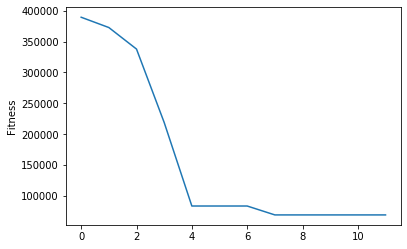

Excution time: 0:00:00.171055s


With 23 skill : 
Generation: 1	Fitness: 395194.2256843397	Population: 218
Generation: 2	Fitness: 320396.4405108675	Population: 253
Generation: 3	Fitness: 302881.62238203397	Population: 320
Generation: 4	Fitness: 141578.9797974416	Population: 368
Generation: 5	Fitness: 80892.92554922846	Population: 391
Generation: 6	Fitness: 69368.1111125503	Population: 398
Generation: 7	Fitness: 69368.1111125503	Population: 394
Generation: 8	Fitness: 69368.1111125503	Population: 398
Generation: 9	Fitness: 69368.1111125503	Population: 397
Generation: 10	Fitness: 69368.1111125503	Population: 398
['Akikaze', 95588.21905, 152897.219, 14612.28333, 9394.183333, 54267.06905, 30121.15238, 51085.07143, 80475.91905, 100.0, 150.3333333, 33666.28571, 21886.56905, 56055.65238, 17297.88571, 1976.666667, 2126.366667, 2888.166667, 21609.78571, 34847.81905, 650.3333333, 421.25, 5712.333333, 21926.70238] 

['I_love_tigersugar', 89816.10909, 104953.6857, 12950.16667, 19596.60909, 40048.05

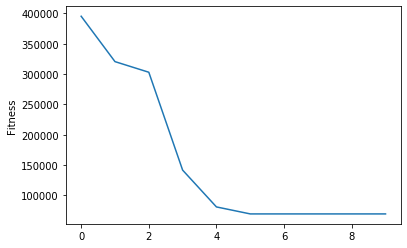

Excution time: 0:00:00.153118s


With 24 skill : 
Generation: 1	Fitness: 352611.3022599401	Population: 218
Generation: 2	Fitness: 352611.3022599401	Population: 261
Generation: 3	Fitness: 200580.93171356662	Population: 341
Generation: 4	Fitness: 137455.0689809908	Population: 370
Generation: 5	Fitness: 83331.95085135043	Population: 393
Generation: 6	Fitness: 83331.95085135043	Population: 396
Generation: 7	Fitness: 69534.5740795586	Population: 396
Generation: 8	Fitness: 69534.5740795586	Population: 399
Generation: 9	Fitness: 69534.57407955859	Population: 399
Generation: 10	Fitness: 69534.57407955859	Population: 399
Generation: 11	Fitness: 69534.57407955859	Population: 399
['I_love_tigersugar', 89816.10909, 104953.6857, 12950.16667, 19596.60909, 40048.05433, 38079.10433, 102108.8758, 77778.36147, 858.6666667, 835.0, 33023.34286, 24913.18766, 44249.58571, 28433.15671, 2376.5, 6900.333333, 9413.683333, 35737.20238, 70672.3329, 4889.35, 2105.083333, 7535.316667, 37195.76905, 8611.283333] 

['

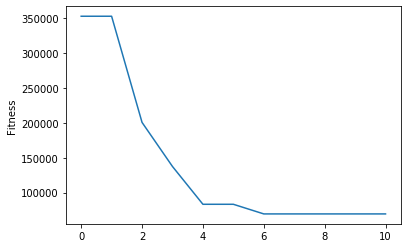

Excution time: 0:00:00.251552s


With 25 skill : 
Generation: 1	Fitness: 384072.0303473247	Population: 220
Generation: 2	Fitness: 368607.4511626016	Population: 257
Generation: 3	Fitness: 276822.8929498922	Population: 325
Generation: 4	Fitness: 156547.85123102352	Population: 375
Generation: 5	Fitness: 131256.16589855248	Population: 396
Generation: 6	Fitness: 131256.16589855248	Population: 389
Generation: 7	Fitness: 131256.16589855248	Population: 399
Generation: 8	Fitness: 131256.16589855248	Population: 398
Generation: 9	Fitness: 131256.16589855248	Population: 399
['I_love_tigersugar', 89816.10909, 104953.6857, 12950.16667, 19596.60909, 40048.05433, 38079.10433, 102108.8758, 77778.36147, 858.6666667, 835.0, 33023.34286, 24913.18766, 44249.58571, 28433.15671, 2376.5, 6900.333333, 9413.683333, 35737.20238, 70672.3329, 4889.35, 2105.083333, 7535.316667, 37195.76905, 8611.283333, 8769.240476] 

['tanphatls987', 125706.7405, 108050.1643, 9688.733333, 8277.116667, 35564.07619, 26902.9619, 6124

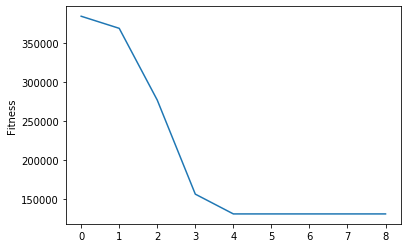

Excution time: 0:00:00.148591s


With 26 skill : 
Generation: 1	Fitness: 366914.5190545637	Population: 215
Generation: 2	Fitness: 275084.734645759	Population: 249
Generation: 3	Fitness: 232430.47301497136	Population: 308
Generation: 4	Fitness: 232430.47301497136	Population: 364
Generation: 5	Fitness: 163879.73656983319	Population: 388
Generation: 6	Fitness: 81712.34517101923	Population: 397
Generation: 7	Fitness: 81712.34517101923	Population: 396
Generation: 8	Fitness: 81712.34517101923	Population: 397
Generation: 9	Fitness: 81712.34517101923	Population: 393
Generation: 10	Fitness: 81712.34517101923	Population: 399
['Akikaze', 95588.21905, 152897.219, 14612.28333, 9394.183333, 54267.06905, 30121.15238, 51085.07143, 80475.91905, 100.0, 150.3333333, 33666.28571, 21886.56905, 56055.65238, 17297.88571, 1976.666667, 2126.366667, 2888.166667, 21609.78571, 34847.81905, 650.3333333, 421.25, 5712.333333, 21926.70238, 5097.416667, 3255.333333, 26515.56667] 

['flashmt', 81797.33214, 106837.8238,

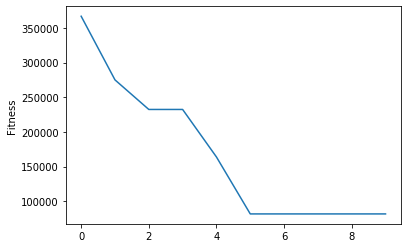

Excution time: 0:00:00.159017s


With 27 skill : 
Generation: 1	Fitness: 279505.2984562903	Population: 223
Generation: 2	Fitness: 279505.2984562903	Population: 256
Generation: 3	Fitness: 246403.92386249997	Population: 335
Generation: 4	Fitness: 160354.85978698015	Population: 372
Generation: 5	Fitness: 71049.73688522221	Population: 391
Generation: 6	Fitness: 71049.73688522221	Population: 396
Generation: 7	Fitness: 71049.73688522221	Population: 398
Generation: 8	Fitness: 71049.73688522221	Population: 400
Generation: 9	Fitness: 71049.73688522221	Population: 400
['tanphatls987', 125706.7405, 108050.1643, 9688.733333, 8277.116667, 35564.07619, 26902.9619, 61243.08333, 73082.36667, 219.0, 149.0, 28087.62143, 14554.61667, 38825.75714, 17712.55, 2241.9, 3133.25, 66741.83333, 21683.45714, 54682.17619, 1352.25, 2066.083333, 4700.2, 22410.94286, 7220.17619, 5156.416667, 18169.1, 13639.95] 

['Akikaze', 95588.21905, 152897.219, 14612.28333, 9394.183333, 54267.06905, 30121.15238, 51085.07143, 80475

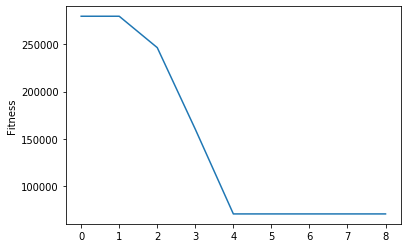

Excution time: 0:00:00.153585s


With 28 skill : 
Generation: 1	Fitness: 301831.0603084198	Population: 220
Generation: 2	Fitness: 301831.0603084198	Population: 262
Generation: 3	Fitness: 235835.12669881026	Population: 327
Generation: 4	Fitness: 128648.55823442088	Population: 371
Generation: 5	Fitness: 85829.6320217362	Population: 385
Generation: 6	Fitness: 73634.33285891391	Population: 397
Generation: 7	Fitness: 73634.33285891391	Population: 399
Generation: 8	Fitness: 73634.33285891391	Population: 399
Generation: 9	Fitness: 73634.33285891391	Population: 398
Generation: 10	Fitness: 73634.33285891391	Population: 399
['tanphatls987', 125706.7405, 108050.1643, 9688.733333, 8277.116667, 35564.07619, 26902.9619, 61243.08333, 73082.36667, 219.0, 149.0, 28087.62143, 14554.61667, 38825.75714, 17712.55, 2241.9, 3133.25, 66741.83333, 21683.45714, 54682.17619, 1352.25, 2066.083333, 4700.2, 22410.94286, 7220.17619, 5156.416667, 18169.1, 13639.95, 64457.16667] 

['I_love_tigersugar', 89816.10909, 10

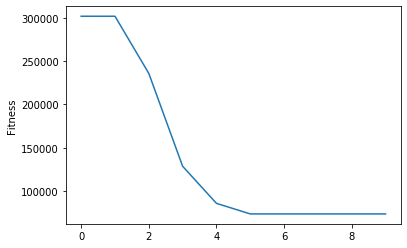

Excution time: 0:00:00.169987s


With 29 skill : 
Generation: 1	Fitness: 422553.30904690956	Population: 218
Generation: 2	Fitness: 397801.11321284465	Population: 255
Generation: 3	Fitness: 353846.2678364789	Population: 325
Generation: 4	Fitness: 222904.4889284419	Population: 374
Generation: 5	Fitness: 85836.33215449228	Population: 385
Generation: 6	Fitness: 73637.76944781796	Population: 395
Generation: 7	Fitness: 73637.76944781796	Population: 397
Generation: 8	Fitness: 73637.76944781796	Population: 395
Generation: 9	Fitness: 73637.76944781796	Population: 399
Generation: 10	Fitness: 73637.76944781796	Population: 396
['tanphatls987', 125706.7405, 108050.1643, 9688.733333, 8277.116667, 35564.07619, 26902.9619, 61243.08333, 73082.36667, 219.0, 149.0, 28087.62143, 14554.61667, 38825.75714, 17712.55, 2241.9, 3133.25, 66741.83333, 21683.45714, 54682.17619, 1352.25, 2066.083333, 4700.2, 22410.94286, 7220.17619, 5156.416667, 18169.1, 13639.95, 64457.16667, 7361.566667] 

['I_love_tigersugar', 8

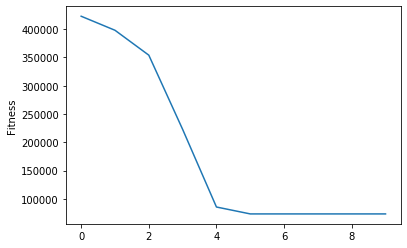

Excution time: 0:00:00.172897s


With 30 skill : 
Generation: 1	Fitness: 397169.36413466034	Population: 211
Generation: 2	Fitness: 368240.8884599646	Population: 236
Generation: 3	Fitness: 278939.4624920238	Population: 286
Generation: 4	Fitness: 173908.18634989596	Population: 356
Generation: 5	Fitness: 173908.18634989596	Population: 383
Generation: 6	Fitness: 73700.64103355365	Population: 393
Generation: 7	Fitness: 73700.64103355365	Population: 396
Generation: 8	Fitness: 73700.64103355365	Population: 398
Generation: 9	Fitness: 73700.64103355365	Population: 400
Generation: 10	Fitness: 73700.64103355365	Population: 400
['tanphatls987', 125706.7405, 108050.1643, 9688.733333, 8277.116667, 35564.07619, 26902.9619, 61243.08333, 73082.36667, 219.0, 149.0, 28087.62143, 14554.61667, 38825.75714, 17712.55, 2241.9, 3133.25, 66741.83333, 21683.45714, 54682.17619, 1352.25, 2066.083333, 4700.2, 22410.94286, 7220.17619, 5156.416667, 18169.1, 13639.95, 64457.16667, 7361.566667, 907.2666667] 

['I_love_

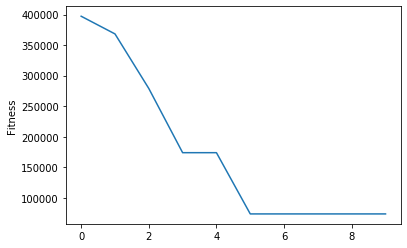

Excution time: 0:00:00.171343s


With 31 skill : 
Generation: 1	Fitness: 316942.9428371904	Population: 218
Generation: 2	Fitness: 316942.9428371904	Population: 257
Generation: 3	Fitness: 245887.836446606	Population: 330
Generation: 4	Fitness: 139962.31555593782	Population: 373
Generation: 5	Fitness: 74005.1852470474	Population: 392
Generation: 6	Fitness: 74005.1852470474	Population: 399
Generation: 7	Fitness: 74005.18524704738	Population: 395
Generation: 8	Fitness: 74005.18524704738	Population: 400
Generation: 9	Fitness: 74005.18524704738	Population: 400
['Akikaze', 95588.21905, 152897.219, 14612.28333, 9394.183333, 54267.06905, 30121.15238, 51085.07143, 80475.91905, 100.0, 150.3333333, 33666.28571, 21886.56905, 56055.65238, 17297.88571, 1976.666667, 2126.366667, 2888.166667, 21609.78571, 34847.81905, 650.3333333, 421.25, 5712.333333, 21926.70238, 5097.416667, 3255.333333, 26515.56667, 13315.5, 3399.0, 8434.033333, 677.5, 11909.65] 

['I_love_tigersugar', 89816.10909, 104953.6857, 1295

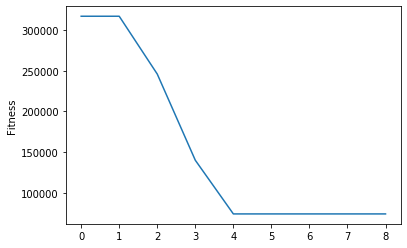

Excution time: 0:00:00.158187s


With 32 skill : 
Generation: 1	Fitness: 336168.1347240508	Population: 215
Generation: 2	Fitness: 336168.1347240508	Population: 247
Generation: 3	Fitness: 281859.7457681891	Population: 303
Generation: 4	Fitness: 215473.5756467697	Population: 366
Generation: 5	Fitness: 140004.53539381662	Population: 384
Generation: 6	Fitness: 85383.54360883139	Population: 394
Generation: 7	Fitness: 85383.54360883139	Population: 392
Generation: 8	Fitness: 85383.54360883139	Population: 399
Generation: 9	Fitness: 85383.54360883139	Population: 399
Generation: 10	Fitness: 85383.54360883139	Population: 400
['tanphatls987', 125706.7405, 108050.1643, 9688.733333, 8277.116667, 35564.07619, 26902.9619, 61243.08333, 73082.36667, 219.0, 149.0, 28087.62143, 14554.61667, 38825.75714, 17712.55, 2241.9, 3133.25, 66741.83333, 21683.45714, 54682.17619, 1352.25, 2066.083333, 4700.2, 22410.94286, 7220.17619, 5156.416667, 18169.1, 13639.95, 64457.16667, 7361.566667, 907.2666667, 9375.62619, 1

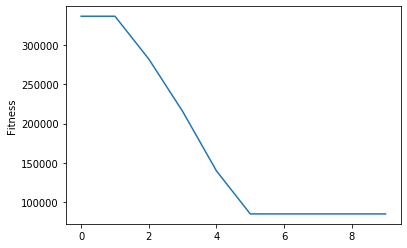

Excution time: 0:00:00.177997s


With 33 skill : 
Generation: 1	Fitness: 353489.99645718234	Population: 219
Generation: 2	Fitness: 180233.6652786106	Population: 251
Generation: 3	Fitness: 180233.6652786106	Population: 335
Generation: 4	Fitness: 180233.6652786106	Population: 367
Generation: 5	Fitness: 169727.89740149447	Population: 390
Generation: 6	Fitness: 126107.61690746504	Population: 392
Generation: 7	Fitness: 85894.44512217768	Population: 399
Generation: 8	Fitness: 85894.44512217768	Population: 397
Generation: 9	Fitness: 85894.44512217768	Population: 399
Generation: 10	Fitness: 85894.44512217768	Population: 400
Generation: 11	Fitness: 85894.44512217768	Population: 398
['tanphatls987', 125706.7405, 108050.1643, 9688.733333, 8277.116667, 35564.07619, 26902.9619, 61243.08333, 73082.36667, 219.0, 149.0, 28087.62143, 14554.61667, 38825.75714, 17712.55, 2241.9, 3133.25, 66741.83333, 21683.45714, 54682.17619, 1352.25, 2066.083333, 4700.2, 22410.94286, 7220.17619, 5156.416667, 18169.1, 13

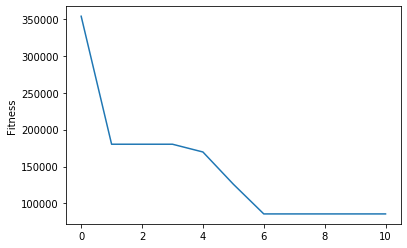

Excution time: 0:00:00.198506s


With 34 skill : 
Generation: 1	Fitness: 352345.5890633627	Population: 219
Generation: 2	Fitness: 352345.5890633627	Population: 254
Generation: 3	Fitness: 270629.15101999	Population: 317
Generation: 4	Fitness: 191823.7346964114	Population: 370
Generation: 5	Fitness: 151349.29602298155	Population: 384
Generation: 6	Fitness: 74050.21151067795	Population: 392
Generation: 7	Fitness: 74050.21151067795	Population: 397
Generation: 8	Fitness: 74050.21151067795	Population: 395
Generation: 9	Fitness: 74050.21151067795	Population: 396
Generation: 10	Fitness: 74050.21151067795	Population: 400
['I_love_tigersugar', 89816.10909, 104953.6857, 12950.16667, 19596.60909, 40048.05433, 38079.10433, 102108.8758, 77778.36147, 858.6666667, 835.0, 33023.34286, 24913.18766, 44249.58571, 28433.15671, 2376.5, 6900.333333, 9413.683333, 35737.20238, 70672.3329, 4889.35, 2105.083333, 7535.316667, 37195.76905, 8611.283333, 8769.240476, 27418.24957, 23917.66667, 2592.266667, 12104.4757

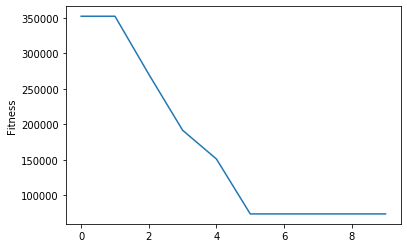

Excution time: 0:00:00.186499s


With 35 skill : 
Generation: 1	Fitness: 1451662.6190168522	Population: 215
Generation: 2	Fitness: 1434960.603651434	Population: 237
Generation: 3	Fitness: 1357413.7566113872	Population: 276
Generation: 4	Fitness: 1357413.7566113872	Population: 335
Generation: 5	Fitness: 933894.4459542615	Population: 365
Generation: 6	Fitness: 690143.9028631785	Population: 380
Generation: 7	Fitness: 456039.68944412033	Population: 365
Generation: 8	Fitness: 456039.68944412033	Population: 378
Generation: 9	Fitness: 456039.68944412033	Population: 366
Generation: 10	Fitness: 456039.68944412033	Population: 363
Generation: 11	Fitness: 456039.68944412033	Population: 364
['NGUYEN_THANH_LOI', 16096.06667, 29175.3, 1959.0, 875.3333333, 9353.283333, 2717.466667, 3712.066667, 13030.15, 0.0, 0.0, 5446.733333, 2913.083333, 13253.33333, 685.0, 0.0, 0.0, 0.0, 2356.233333, 2557.533333, 0.0, 0.0, 616.0, 1877.333333, 367.5, 160.0, 6881.166667, 890.75, 0.5, 150.0, 0.0, 1242.166667, 60.0, 0.

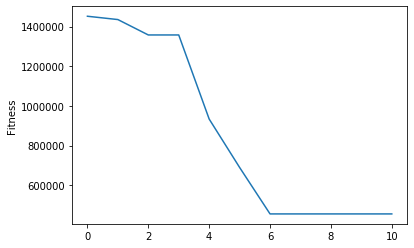

Excution time: 0:00:00.289743s


With 36 skill : 
Generation: 1	Fitness: 1450847.9406323326	Population: 218
Generation: 2	Fitness: 1453860.170155884	Population: 250
Generation: 3	Fitness: 1453860.170155884	Population: 301
Generation: 4	Fitness: 1173172.6864193229	Population: 340
Generation: 5	Fitness: 1126720.7003391127	Population: 373
Generation: 6	Fitness: 891907.7131225937	Population: 390
Generation: 7	Fitness: 659107.6530205217	Population: 377
Generation: 8	Fitness: 456081.7315102442	Population: 380
Generation: 9	Fitness: 456081.7315102442	Population: 380
Generation: 10	Fitness: 456081.7315102442	Population: 392
Generation: 11	Fitness: 456081.7315102442	Population: 380
Generation: 12	Fitness: 456081.7315102442	Population: 377
['I_love_tigersugar', 89816.10909, 104953.6857, 12950.16667, 19596.60909, 40048.05433, 38079.10433, 102108.8758, 77778.36147, 858.6666667, 835.0, 33023.34286, 24913.18766, 44249.58571, 28433.15671, 2376.5, 6900.333333, 9413.683333, 35737.20238, 70672.3329, 488

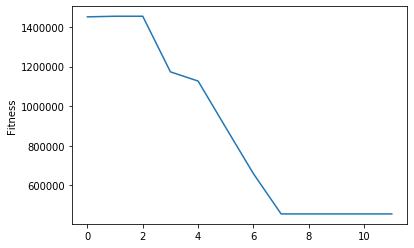

Excution time: 0:00:00.386962s


With 37 skill : 
Generation: 1	Fitness: 1450690.2611530232	Population: 221
Generation: 2	Fitness: 1418590.8618366714	Population: 262
Generation: 3	Fitness: 1213117.3503889847	Population: 318
Generation: 4	Fitness: 926410.0137276229	Population: 360
Generation: 5	Fitness: 690174.3957340005	Population: 381
Generation: 6	Fitness: 491577.8050217156	Population: 368
Generation: 7	Fitness: 456083.00667710963	Population: 367
Generation: 8	Fitness: 456083.00667710963	Population: 367
Generation: 9	Fitness: 456083.00667710963	Population: 354
Generation: 10	Fitness: 456083.00667710963	Population: 364
Generation: 11	Fitness: 456083.00667710963	Population: 362
['CNH_OneDay', 24924.2, 40641.73333, 2248.833333, 700.5, 11638.15, 3200.0, 6235.116667, 20589.23333, 0.0, 150.0, 8244.45, 4363.45, 11183.28333, 905.25, 75.0, 100.25, 76.5, 2423.616667, 3304.583333, 75.0, 75.0, 676.8333333, 2359.033333, 403.0, 0.833333333, 5282.666667, 2127.5, 225.25, 1115.033333, 87.75, 1168.0, 

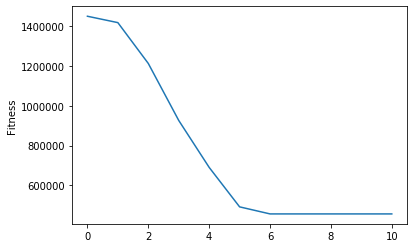

Excution time: 0:00:00.305067s




In [19]:
import numpy as np
import csv
import heapq
import random
import math
import matplotlib.pyplot as plt
import atexit
from time import time, strftime, localtime
from datetime import timedelta

def secondsToStr(elapsed=None):
    if elapsed is None:
        return strftime("%S", localtime())
    else:
        return str(timedelta(seconds=elapsed))

def log(s, elapsed=None):
    line = "="*40
    if elapsed:
        print(elapsed)

def endlog(start):
    end = time()
    elapsed = end-start
    return secondsToStr(elapsed)


h_member = 3
generation_size = 5
list_fitness =[]
population_temp = []
Z = 0.3

## so skill chuyen vao
m_skill = 37

with open(r"C:\Users\DUONG\Desktop\data-selection\data.norm2.csv", "rt",encoding = 'unicode_escape') as f:
    reader = csv.reader((line.replace('\0','') for line in f))
    countt = 0
    for line in enumerate(reader):
        count=0
        check_mskill = 0
        candi = []
        for row in line[1]:
            if(countt == 0):
                candi.append(row)
                count = count + 1
            else:
                if(count < 3):
                    candi.append(row)
                else:
                    candi.append(float(row))
                count = count + 1
            check_mskill += 1
        countt += 1
        population_temp.append(candi)
    population_size = round((len(population_temp)-1)*0.8)
    m = m_skill
    
start = time()
atexit.register(endlog)
log("")

del population_temp[0]
for i in range(0,len(population_temp)):
    del population_temp[i][0]
    del population_temp[i][1]

class Individual(object):
    def __init__(self, candi,list_score): 
        self.candi = candi 
        self.list_score = list_score
        self.fitness = self.cal_fitness()

    def cal_fitness(self):
        fitness = 0
        for j in range(1,m+1):
            team_score = 0
            for k in range(h_member):
                team_score = team_score + self.candi[k][j]
            fitness = fitness + (self.list_score[j-1]-team_score)**2
        fitness = math.sqrt(fitness)
        return fitness
    
    def mate(self,partner):
        child = []
        for gp1, gp2 in zip(self.candi,partner.candi):
            sum_gp1 = sum(gp1[1:m+1])
            sum_gp2 = sum(gp2[1:m+1])
            bett = gp1 if sum_gp1 > sum_gp2 else gp2
            wors = gp2 if sum_gp1 > sum_gp2 else gp1
            prob = random.random()
            if prob < 0.60:
                if bett in child:
                    pass
                else:
                    child.append(bett)
            elif prob < 0.90:
                if wors in child:
                    pass
                else:
                    child.append(wors)
            else:
                tem = random.choice(population_temp[::])
                if tem in child:
                    pass
                else:
                    child.append(tem)
        while len(child) < 3:
            j = random.choice(population_temp[::])
            if j in child:
                pass
            else:
                child.append(j)
        return Individual(child,list_score)
    
    def check_minimumscore(self,list_score):
        for j in range(1,m+1):
            team_score = 0
            for k in range(h_member):
                team_score = team_score + self.candi[k][j]
            if Z*list_score[j-1] > team_score:
                return 0
            else:
                return 1
#     def check_cost(self):
#         for j in range(1,m+1):
#             team_score = 0
#             for k in range(h_member):
#                 team_score = team_score + self.candi[k][j]
#             if Z*list_score[j-1] > team_score:
#                 return 0
#             else:
#                 return 1

def GAs(m_skill):
    start = time()
    global population_size
    global generation_size
    global m
    m = m_skill
    list_fitness = []
    global h_member
    population = []
    candi = []

    list_score = []
    score = []
    for j in range(1,m+1):
        for i in range(0,len(population_temp)-1):
            score.append(population_temp[i][j])
        top3 = sorted(zip(score), reverse=True)[:h_member]
        summ = 0
        for i in top3:
            summ = summ + i[0]
        list_score.append(summ)
        score = []
    
    for _ in range(0,population_size):
        for _ in range(h_member):
            while len(candi) < 3:
                j = random.choice(population_temp[::])
                if j in candi:
                    pass
                else:
                    candi.append(j)
        copy = candi.copy()
        population.append(Individual(copy,list_score))
        del candi[::]
        
    loop_check = False
    generation = 1

    print("With {0} skill : ".format(m_skill))
    while True:
        population = sorted(population, key = lambda x:x.fitness,reverse=False)
        
        new_generation = []
        s = int((10*population_size)/100)
        new_generation.extend(population[:s])
        
        s = int((90*population_size)/100)
        for _ in range(s):
            parent1 = random.choice(population[:round(population_size*0.5)])
            parent2 = random.choice(population[:round(population_size*0.5)])
            child = parent1.mate(parent2)
            new_generation.append(child) 
  
        population = new_generation
        for p in population:
            if (p.check_minimumscore(list_score) !=1):
                population.remove(p)
                
        print("Generation: {0}\tFitness: {1}\tPopulation: {2}".
        format(generation,
        population[0].fitness,len(population)))
        list_fitness.append(round(population[0].fitness))
        
        if generation_size - generation < 0:
            fit_check = list_fitness[generation-1]
            j = 1
            for i in range(1,generation_size+1):
                if list_fitness[generation-i-1] == fit_check:
                    j = j + 1
            if j == 5:
                loop_check = True
        if loop_check == True:
            break
        generation += 1

    for i in range(h_member):
        print(population[0].candi[i][0:m_skill+1],"\n")
        
    return list_fitness,endlog(start)

def main():
    for i in range(1,m_skill+1):
        list_fitness,end = GAs(i)
        plt.plot(list_fitness)
        plt.ylabel('Fitness')
        plt.show()
        print("Excution time: {0}s\n\n".format(end))
#     list_fitness,end = GAs(37)
#     plt.plot(list_fitness)
#     plt.ylabel('Fitness')
#     plt.show()
#     print("Excution time: {0}s\n\n".format(end))

if __name__ == '__main__':
    main()


In [48]:
#     population = []
#     candi = []

#     for _ in range(0,population_size):
#         for _ in range(h_member):
#             while len(candi) < 3:
#                 j = random.choice(population_temp[::])
#                 if j in candi:
#                     pass
#                 else:
#                     candi.append(j)
#         copy = candi.copy()
#         population.append(Individual(copy))
#         del candi[::]

In [ ]:
#     for _ in range(0,population_size-1):
#         if(limit <= len(population_temp)-3):
#             candi.append(population_temp[limit])
#             candi.append(population_temp[limit+1])
#             candi.append(population_temp[limit+2])
#             limit += 3
#         else:
#             while len(candi) < 3:
#                 j = random.choice(population_temp[::])
#                 if j in candi:
#                     pass
#                 else:
#                     candi.append(j)
#         copy = candi.copy()
#         population.append(Individual(copy))
#         del candi[::]

## Run 1 time

Population in the beginning: 400
Generation: 1	Fitness: 1444264.9020418571	Population: 214
Generation: 2	Fitness: 1444264.9020418571	Population: 234
Generation: 3	Fitness: 1428264.3615645003	Population: 287
Generation: 4	Fitness: 1364619.0751812765	Population: 346
Generation: 5	Fitness: 903145.7678491632	Population: 347
Generation: 6	Fitness: 871749.3310916235	Population: 368
Generation: 7	Fitness: 456083.00667710963	Population: 365
Generation: 8	Fitness: 456083.00667710963	Population: 369
Generation: 9	Fitness: 456083.00667710963	Population: 376
Generation: 10	Fitness: 456083.00667710963	Population: 363
Generation: 11	Fitness: 456083.00667710963	Population: 364


['I_love_tigersugar', 89816.10909, 104953.6857, 12950.16667, 19596.60909, 40048.05433, 38079.10433, 102108.8758, 77778.36147, 858.6666667, 835.0, 33023.34286, 24913.18766, 44249.58571, 28433.15671, 2376.5, 6900.333333, 9413.683333, 35737.20238, 70672.3329, 4889.35, 2105.083333, 7535.316667, 37195.76905, 8611.283333, 8769.2404

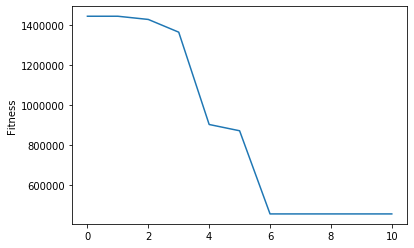

In [12]:
import numpy as np
import csv
import heapq
import random
import math
import matplotlib.pyplot as plt
import atexit
from time import time, strftime, localtime
from datetime import timedelta

def secondsToStr(elapsed=None):
    if elapsed is None:
        return strftime("%S", localtime())
    else:
        return str(timedelta(seconds=elapsed))

def log(s, elapsed=None):
    line = "="*40
    if elapsed:
        print(elapsed)

def endlog():
    end = time()
    elapsed = end-start
    return secondsToStr(elapsed)


h_member = 3
generation_size = 5
list_fitness =[]
population_temp = []

## so skill chuyen vao
m_skill = 37

with open(r"C:\Users\DUONG\Desktop\data-selection\data.norm2.csv", "rt",encoding = 'unicode_escape') as f:
    reader = csv.reader((line.replace('\0','') for line in f))
    countt = 0
    for line in enumerate(reader):
        count=0
        check_mskill = 0
        candi = []
        for row in line[1]:
            if check_mskill - 3 == m_skill:
                break
            if(countt == 0):
                candi.append(row)
                count = count + 1
            else:
                if(count < 3):
                    candi.append(row)
                else:
                    candi.append(float(row))
                count = count + 1
            check_mskill += 1
        countt += 1
        population_temp.append(candi)
    population_size = round((len(population_temp)-1)*0.8)
    m = m_skill
    
start = time()
atexit.register(endlog)
log("")

del population_temp[0]
for i in range(0,len(population_temp)):
    del population_temp[i][0]
    del population_temp[i][1]
    
list_score = []
score = []
for j in range(1,m+1):
    for i in range(0,len(population_temp)-1):
        score.append(population_temp[i][j])
    top3 = sorted(zip(score), reverse=True)[:h_member]
    summ = 0
    for i in top3:
        summ = summ + i[0]
    list_score.append(summ)
    score = []

class Individual(object):
    def __init__(self, candi): 
        self.candi = candi  
        self.fitness = self.cal_fitness() 

    def cal_fitness(self):
        fitness = 0
        for j in range(1,m+1):
            team_score = 0
            for k in range(h_member):
                team_score = team_score + self.candi[k][j]
            fitness = fitness + (list_score[j-1]-team_score)**2
        fitness = math.sqrt(fitness)
        return fitness
    
    def mate(self,partner):
        child = []
        for gp1, gp2 in zip(self.candi,partner.candi):
            sum_gp1 = sum(gp1[1:m+1])
            sum_gp2 = sum(gp2[1:m+1])
            bett = gp1 if sum_gp1 > sum_gp2 else gp2
            wors = gp2 if sum_gp1 > sum_gp2 else gp1
            prob = random.random()
            if prob < 0.60:
                if bett in child:
                    pass
                else:
                    child.append(bett)
            elif prob < 0.90:
                if wors in child:
                    pass
                else:
                    child.append(wors)
            else:
                tem = random.choice(population_temp[::])
                if tem in child:
                    pass
                else:
                    child.append(tem)
        while len(child) < 3:
            j = random.choice(population_temp[::])
            if j in child:
                pass
            else:
                child.append(j)
        return Individual(child)
    
    def check_minimumscore(self):
        for j in range(1,m+1):
            team_score = 0
            for k in range(h_member):
                team_score = team_score + self.candi[k][j]
            if 0.3*list_score[j-1] > team_score:
                return 0
            else:
                return 1
    def check_cost(self):
        for j in range(1,m+1):
            team_score = 0
            for k in range(h_member):
                team_score = team_score + self.candi[k][j]
            if 0.3*list_score[j-1] > team_score:
                return 0
            else:
                return 1
    
def main():
    global population_size
    global generation_size
    global list_fitness
    global h_member
    population = []
    candi = []

    for _ in range(0,population_size):
        for _ in range(h_member):
            while len(candi) < 3:
                j = random.choice(population_temp[::])
                if j in candi:
                    pass
                else:
                    candi.append(j)
        copy = candi.copy()
        population.append(Individual(copy))
        del candi[::]

    loop_check = False
    generation = 1
#     for i in range(0,len(list_score)):
#         print(list_score[i])
    print("Population in the beginning: {0}".format(len(population)))
    while True:
        population = sorted(population, key = lambda x:x.fitness,reverse=False)
        
        new_generation = []
        s = int((10*population_size)/100)
        new_generation.extend(population[:s])
        
        s = int((90*population_size)/100)
        for _ in range(s):
            parent1 = random.choice(population[:round(population_size*0.5)])
            parent2 = random.choice(population[:round(population_size*0.5)])
            child = parent1.mate(parent2)
            new_generation.append(child) 
  
        population = new_generation
        for p in population:
            if (p.check_minimumscore() !=1):
                population.remove(p)
        print("Generation: {0}\tFitness: {1}\tPopulation: {2}".
        format(generation,
        population[0].fitness,len(population)))
        list_fitness.append(round(population[0].fitness))
        
        if generation_size - generation < 0:
            fit_check = list_fitness[generation-1]
            j = 1
            for i in range(1,generation_size+1):
                if list_fitness[generation-i-1] == fit_check:
                    j = j + 1
            if j == 5:
                loop_check = True
        if loop_check == True:
            break
        generation += 1

    print("\n")
    for i in range(h_member):
        print(population[0].candi[i],"\n")
if __name__ == '__main__':
    main()

plt.plot(list_fitness)
plt.ylabel('Fitness')
print("\n\nExcution time: {0}s".format(endlog()))